In [150]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [151]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

# Season Dataset (Version 2)
In this version, we will have the `month` feature like in version 1. In addition to that, we have added a new `day` feature.
It is still a model for the seasons in Northern semisphere, and
we set the following rule:

- Spring: 1st March to end May (inclusive)
- Summer: 1st June to end August
- Autumn: 1st September to end November
- Winter: 1st December to end February

Let's make a list named `L_month_day` as follows:

```python
print(L_month_day)

[[1,1],
 [1,2],
 ...,
 [1,31],
 [2,1],
 ...,
 [2,28],
 ...,
 [12,31],
]
```

In [152]:
from constants import *

In [153]:
X = np.array(L_month_day)
X

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15],
       [ 1, 16],
       [ 1, 17],
       [ 1, 18],
       [ 1, 19],
       [ 1, 20],
       [ 1, 21],
       [ 1, 22],
       [ 1, 23],
       [ 1, 24],
       [ 1, 25],
       [ 1, 26],
       [ 1, 27],
       [ 1, 28],
       [ 1, 29],
       [ 1, 30],
       [ 1, 31],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 2, 12],
       [ 2, 13],
       [ 2, 14],
       [ 2, 15],
       [ 2, 16],
       [ 2, 17],
       [ 2, 18],
       [ 2, 19],
       [ 2, 20],
       [ 2, 21],
       [ 2, 22],
       [ 2, 23],
       [ 2, 24],
       [ 2, 25],
       [ 2, 26],
       [ 2, 27],
       [ 2, 28

In [154]:
y_rule1 = []
for month, _ in L_month_day:
    if MAR <= month <= MAY:
        y_rule1.append(SPRING)
    elif JUN <= month <= AUG:
        y_rule1.append(SUMMER)
    elif SEP <= month <= NOV:
        y_rule1.append(AUTUMN)
    else:
        y_rule1.append(WINTER)
y_rule1[0:-1:31]

[3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3]

## How to Split Train/Test sets?

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit

In [156]:
y_rule1 = np.array(y_rule1)

In [157]:
split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=SEED)
# stratified shuffling based on `month`
for train_indices, test_indices in split.split(X, X[:, 0]):
    pass
X_train_raw = X[train_indices, :]
X_test_raw = X[test_indices, :]
y_rule1_train = y_rule1[train_indices]
y_rule1_test = y_rule1[test_indices]

## First Dataset, First Model
Just take `X_train_raw` and `X_test_raw` to train a few ML models and see what that gives.

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [159]:
log_clf = LogisticRegression(multi_class="ovr")
softmax_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=0.5)
tree_clf = DecisionTreeClassifier()
#svm_clf = SVC(probability=True)
svm_clf = SVC()
#rnd_clf = RandomForestClassifier()
T_classifiers = (log_clf, softmax_clf, tree_clf, svm_clf)

In [160]:
for clf in T_classifiers:
    clf.fit(X_train_raw, y_rule1_train)
    y_pred = clf.predict(X_test_raw)
    
    acc = accuracy_score(y_rule1_test, y_pred)

    ## ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
    #precision = precision_score(y_rule1_test, y_pred)
    ## TypeError: unsupported format string passed to numpy.ndarray.__format__
    #precision = precision_score(y_rule1_test, y_pred, average=None)
    precision = precision_score(y_rule1_test, y_pred, average="weighted")

    #recall = recall_score(y_rule1_test, y_pred)
    #recall = recall_score(y_rule1_test, y_pred, average=None)
    recall = recall_score(y_rule1_test, y_pred, average="weighted")

    print(f"({clf.__class__.__name__})\nacc = {acc:.2f}, precision = {precision:.2f}, recall = {recall:.2f}\n")


(LogisticRegression)
acc = 0.67, precision = 0.57, recall = 0.67

(LogisticRegression)
acc = 0.64, precision = 0.57, recall = 0.64

(DecisionTreeClassifier)
acc = 1.00, precision = 1.00, recall = 1.00

(SVC)
acc = 0.82, precision = 0.87, recall = 0.82



In [161]:
# What about performance on the training data?
for clf in T_classifiers:
    #clf.fit(X_train_raw, y_rule1_train)
    y_pred = clf.predict(X_train_raw)
    acc = accuracy_score(y_rule1_train, y_pred)
    precision = precision_score(y_rule1_train, y_pred, average="micro")
    recall = recall_score(y_rule1_train, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.2f}, precision = {precision:.2f}, recall = {recall:.2f}\n")

(LogisticRegression)
acc = 0.65, precision = 0.65, recall = 0.65

(LogisticRegression)
acc = 0.65, precision = 0.65, recall = 0.65

(DecisionTreeClassifier)
acc = 1.00, precision = 1.00, recall = 1.00

(SVC)
acc = 0.88, precision = 0.88, recall = 0.88



We see that

- Random forest performances perfectly. So does decision tree.

Maybe the task is too simple. Even without taking the cyclic nature into consideration, some of the classifiers
can already reach near perfect performance.


### Visualize The Decisions
Let's try to visualize the decisions of each classifier above in order to better understand
the shown performance.

Let's first print the decisions made by the decision tree via `graphviz`.

In [162]:
from sklearn.tree import export_graphviz
from graphviz import Source

out_png = ./tmp.png


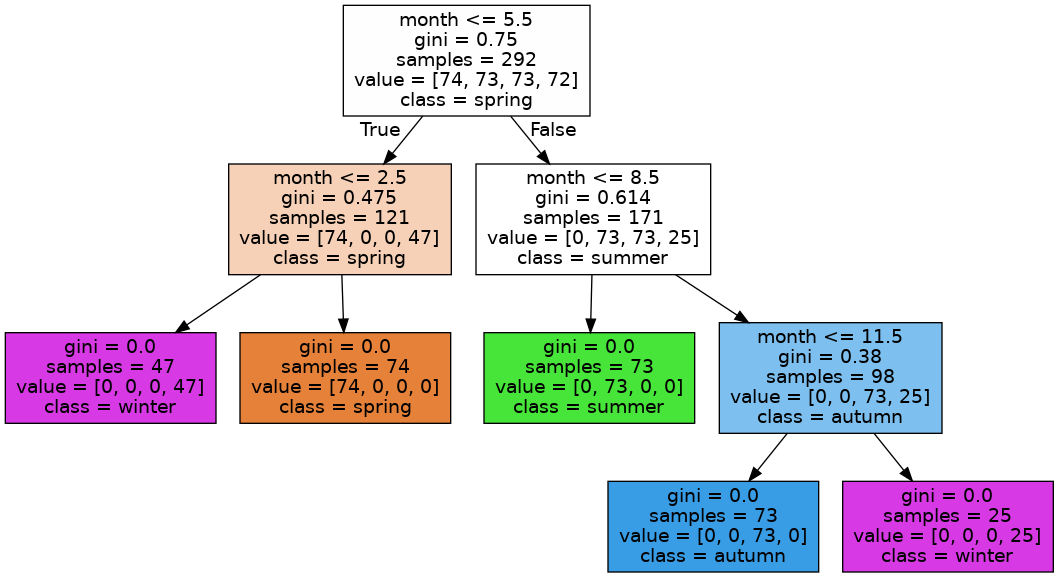

In [163]:
out_dot = "./tmp.dot"
export_graphviz(
    tree_clf,
    out_file=out_file,
    feature_names=["month", "day"],
    class_names=["spring", "summer", "autumn", "winter"],
    #rounded=True,
    filled=True,
)

out_png = ".".join(out_dot.split(".")[:-1] + ["png"])
print(f"out_png = {out_png}")
!dot -Tpng $out_dot -o $out_png
from IPython.display import Image
Image(filename=out_png, width=500)
#Source.from_file(out_file)  ## Too big
#<img src="tmp.png" width=400px />  ## Can't display HTML in code cell!

If we inspect closely, we can see that the above decision tree has found a process for determining the seasons that **_perfectly matches_** our `rule1`. Good job!

In [164]:
# Let's delete the temporary images
![ -f $out_png ] && rm $out_png $out_dot

In [165]:
y_rule1_test

array([0, 2, 0, 3, 1, 0, 3, 3, 2, 0, 0, 0, 2, 3, 1, 1, 3, 2, 2, 1, 1, 0,
       1, 1, 3, 0, 3, 2, 2, 0, 0, 2, 3, 1, 2, 1, 1, 3, 2, 0, 2, 3, 3, 1,
       1, 3, 2, 1, 2, 2, 0, 1, 3, 0, 0, 0, 2, 2, 1, 1, 2, 3, 2, 1, 1, 0,
       1, 3, 3, 0, 0, 3, 3])

In [166]:
season_markers = np.array(("g>", "r^", "o<", "cv"))
season_markers[y_rule1_test]

array(['g>', 'o<', 'g>', 'cv', 'r^', 'g>', 'cv', 'cv', 'o<', 'g>', 'g>',
       'g>', 'o<', 'cv', 'r^', 'r^', 'cv', 'o<', 'o<', 'r^', 'r^', 'g>',
       'r^', 'r^', 'cv', 'g>', 'cv', 'o<', 'o<', 'g>', 'g>', 'o<', 'cv',
       'r^', 'o<', 'r^', 'r^', 'cv', 'o<', 'g>', 'o<', 'cv', 'cv', 'r^',
       'r^', 'cv', 'o<', 'r^', 'o<', 'o<', 'g>', 'r^', 'cv', 'g>', 'g>',
       'g>', 'o<', 'o<', 'r^', 'r^', 'o<', 'cv', 'o<', 'r^', 'r^', 'g>',
       'r^', 'cv', 'cv', 'g>', 'g>', 'cv', 'cv'], dtype='<U2')

In [167]:
season_markers[y_rule1_test[y_rule1_test==3]]

array(['cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv',
       'cv', 'cv', 'cv', 'cv', 'cv', 'cv', 'cv'], dtype='<U2')

In [168]:
X_test_raw.shape

(73, 2)

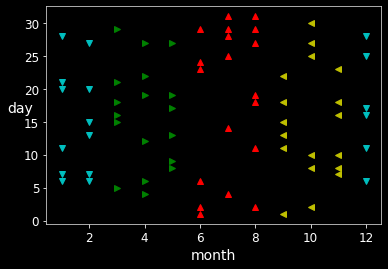

In [169]:
season_markers = ("g>", "r^", "y<", "cv")
for season_id in range(4):
    plt.plot(X_test_raw[:,0][y_rule1_test==season_id],
             X_test_raw[:,1][y_rule1_test==season_id],
             season_markers[season_id],
    )
plt.xlabel("month")
plt.ylabel("day", rotation=0);
#plt.ylabel("day");

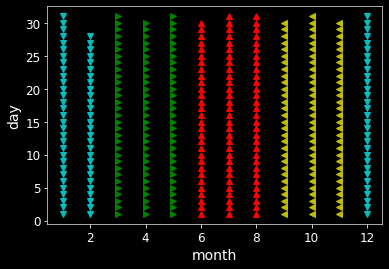

In [170]:
season_markers = ("g>", "r^", "y<", "cv")
for season_id in range(4):
    plt.plot(X[:,0][y_rule1==season_id],
             X[:,1][y_rule1==season_id],
             season_markers[season_id],
    )
plt.xlabel("month")
plt.ylabel("day");

For this drawing part, we shall borrow the following code from one of Mr. Geron's notebooks ([`06_decision_trees.ipynb`](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb) **N.B.** We modified a few of its parameters to suit our case here):

In [233]:
def plot_decision_boundary(clf, X, y, axes=[1, 12, 1, 31], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#007900','#d90052','#bbbb00', '#1174ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50', "#0000ee"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        for season_id in range(4):
            plt.plot(X[:,0][y==season_id],
                     X[:,1][y==season_id],
                     season_markers[season_id],
            )
        plt.axis(axes)
    if iris:
        plt.xlabel("month", fontsize=14)
        plt.ylabel("day", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [100]:
np.linspace(0,1,6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [101]:
x1s = np.linspace(0, 1, 6)
x2s = np.linspace(0, 1, 5)
x1, x2 = np.meshgrid(x1s, x2s)
x1, x2

(array([[0. , 0.2, 0.4, 0.6, 0.8, 1. ],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. ]]),
 array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]]))

In [102]:
x2.ravel()

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [103]:
x1.ravel()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0. , 0.2, 0.4, 0.6, 0.8, 1. , 0. ,
       0.2, 0.4, 0.6, 0.8, 1. , 0. , 0.2, 0.4, 0.6, 0.8, 1. , 0. , 0.2,
       0.4, 0.6, 0.8, 1. ])

In [104]:
x1.ravel(order="F")

array([0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 0.8, 1. ,
       1. , 1. , 1. , 1. ])

In [105]:
x1.flat

In [106]:
help(x1.flat)

Help on flatiter object:

class flatiter(builtins.object)
 |  Flat iterator object to iterate over arrays.
 |  
 |  A `flatiter` iterator is returned by ``x.flat`` for any array `x`.
 |  It allows iterating over the array as if it were a 1-D array,
 |  either in a for-loop or by calling its `next` method.
 |  
 |  Iteration is done in row-major, C-style order (the last
 |  index varying the fastest). The iterator can also be indexed using
 |  basic slicing or advanced indexing.
 |  
 |  See Also
 |  --------
 |  ndarray.flat : Return a flat iterator over an array.
 |  ndarray.flatten : Returns a flattened copy of an array.
 |  
 |  Notes
 |  -----
 |  A `flatiter` iterator can not be constructed directly from Python code
 |  by calling the `flatiter` constructor.
 |  
 |  Examples
 |  --------
 |  >>> x = np.arange(6).reshape(2, 3)
 |  >>> fl = x.flat
 |  >>> type(fl)
 |  <class 'numpy.flatiter'>
 |  >>> for item in fl:
 |  ...     print(item)
 |  ...
 |  0
 |  1
 |  2
 |  3
 |  4
 |  

In [76]:
help(np.ravel)

Help on function ravel in module numpy:

ravel(a, order='C')
    Return a contiguous flattened array.
    
    A 1-D array, containing the elements of the input, is returned.  A copy is
    made only if needed.
    
    As of NumPy 1.10, the returned array will have the same type as the input
    array. (for example, a masked array will be returned for a masked array
    input)
    
    Parameters
    ----------
    a : array_like
        Input array.  The elements in `a` are read in the order specified by
        `order`, and packed as a 1-D array.
    order : {'C','F', 'A', 'K'}, optional
    
        The elements of `a` are read using this index order. 'C' means
        to index the elements in row-major, C-style order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest.  'F' means to index the elements
        in column-major, Fortran-style order, with the
        first index changing fastest, and the last index changing
       

In [81]:
%%timeit
x1.ravel()

128 ns ± 7.09 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [82]:
%%timeit
x1.ravel(order="F")

599 ns ± 3.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [83]:
%%timeit
x1.reshape((-1,))

206 ns ± 2.77 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [84]:
%%timeit
x1.flat

108 ns ± 3.91 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


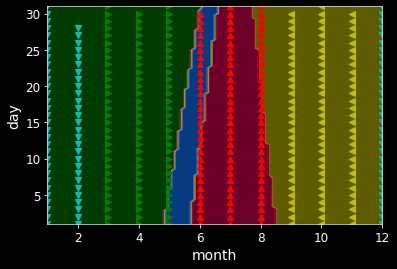

In [235]:
plot_decision_boundary(log_clf, X, y_rule1)

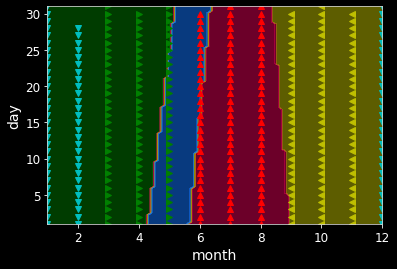

In [236]:
plot_decision_boundary(softmax_clf, X, y_rule1)

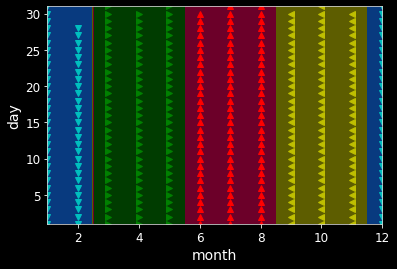

In [237]:
plot_decision_boundary(tree_clf, X, y_rule1)

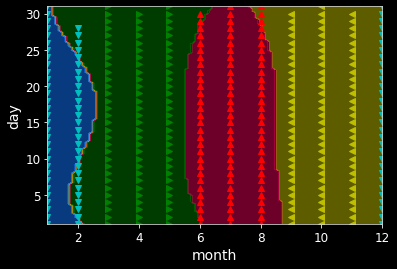

In [238]:
plot_decision_boundary(svm_clf, X, y_rule1)

# Season Dataset (Version 3)
In this version, we will have exactly the same features like in version 2.<br>
Only that we set a diff rule to increase the difficulty:

- Spring: 15th March to 14th June (inclusive)
- Summer: 15th June to 14th September
- Autumn: 15th September to 14th December
- Winter: 15th December to 14th March

**N.B.** Note that we just need to create a new label, `y_rule2`. No need to modify `X`.

In [13]:
y_rule2 = []
start = 15
end = 14
for month_day in L_month_day:
    if [MAR,start] <= month_day <= [JUN,end]:
        y_rule2.append(SPRING)
    elif [JUN,start] <= month_day <= [SEP,end]:
        y_rule2.append(SUMMER)
    elif [SEP,start] <= month_day <= [DEC,end]:
        y_rule2.append(AUTUMN)
    else:
        y_rule2.append(WINTER)

y_rule2[0:-1:31]

[3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2]

In [14]:
y_rule2 = np.array(y_rule2)

In [15]:
y_rule2_train = y_rule2[train_indices]
y_rule2_test = y_rule2[test_indices]

In [16]:
for clf in T_classifiers:
    clf.fit(X_train_raw, y_rule2_train)
    y_pred = clf.predict(X_test_raw)
    acc = accuracy_score(y_rule2_test, y_pred)
    precision = precision_score(y_rule2_test, y_pred, average="micro")
    recall = recall_score(y_rule2_test, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.7123, precision = 0.7123, recall = 0.7123

(DecisionTreeClassifier)
acc = 0.9726, precision = 0.9726, recall = 0.9726

(SVC)
acc = 0.8630, precision = 0.8630, recall = 0.8630



In this case, our <s>random forest</s> and decision tree classifies are no longer perfect (even though still perform with high accuracy).

In [17]:
# On training set
for clf in T_classifiers:
    y_pred = clf.predict(X_train_raw)
    acc = accuracy_score(y_rule2_train, y_pred)
    precision = precision_score(y_rule2_train, y_pred, average="micro")
    recall = recall_score(y_rule2_train, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.7432, precision = 0.7432, recall = 0.7432

(DecisionTreeClassifier)
acc = 1.0000, precision = 1.0000, recall = 1.0000

(SVC)
acc = 0.9075, precision = 0.9075, recall = 0.9075



Let's see whether incorporating the cyclic nature improves the situation.

## Cyclic Nature

In [18]:
from utils import *

In [19]:
X_cyclic = np.c_[
    cyclicize_series(X[:, 0], max_=12, min_=0),
    cyclicize_series(X[:, 1], max_=31, min_=0),
]

In [20]:
X_train_cyclic = X_cyclic[train_indices]
X_test_cyclic = X_cyclic[test_indices]

In [21]:
# On test set (rule2)
for clf in T_classifiers:
    clf.fit(X_train_cyclic, y_rule2_train)
    y_pred = clf.predict(X_test_cyclic)
    acc = accuracy_score(y_rule2_test, y_pred)
    precision = precision_score(y_rule2_test, y_pred, average="micro")
    recall = recall_score(y_rule2_test, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.7945, precision = 0.7945, recall = 0.7945

(DecisionTreeClassifier)
acc = 0.9726, precision = 0.9726, recall = 0.9726

(SVC)
acc = 0.9726, precision = 0.9726, recall = 0.9726



In [22]:
# On training set (rule2)
for clf in T_classifiers:
    y_pred = clf.predict(X_train_cyclic)
    acc = accuracy_score(y_rule2_train, y_pred)
    precision = precision_score(y_rule2_train, y_pred, average="micro")
    recall = recall_score(y_rule2_train, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.8219, precision = 0.8219, recall = 0.8219

(DecisionTreeClassifier)
acc = 1.0000, precision = 1.0000, recall = 1.0000

(SVC)
acc = 1.0000, precision = 1.0000, recall = 1.0000



In [24]:
# On test set (rule1)
for clf in T_classifiers:
    clf.fit(X_train_cyclic, y_rule1_train)
    y_pred = clf.predict(X_test_cyclic)
    acc = accuracy_score(y_rule1_test, y_pred)
    precision = precision_score(y_rule1_test, y_pred, average="micro")
    recall = recall_score(y_rule1_test, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 1.0000, precision = 1.0000, recall = 1.0000

(DecisionTreeClassifier)
acc = 1.0000, precision = 1.0000, recall = 1.0000

(SVC)
acc = 1.0000, precision = 1.0000, recall = 1.0000



## Putting Together for Comparison

In [25]:
# Rule 2, non-cyclic
for clf in T_classifiers:
    clf.fit(X_train_raw, y_rule2_train)
    y_pred = clf.predict(X_test_raw)
    acc = accuracy_score(y_rule2_test, y_pred)
    precision = precision_score(y_rule2_test, y_pred, average="micro")
    recall = recall_score(y_rule2_test, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.7123, precision = 0.7123, recall = 0.7123

(DecisionTreeClassifier)
acc = 0.9726, precision = 0.9726, recall = 0.9726

(SVC)
acc = 0.8630, precision = 0.8630, recall = 0.8630



In [26]:
# Rule 2, cyclic
for clf in T_classifiers:
    clf.fit(X_train_cyclic, y_rule2_train)
    y_pred = clf.predict(X_test_cyclic)
    acc = accuracy_score(y_rule2_test, y_pred)
    precision = precision_score(y_rule2_test, y_pred, average="micro")
    recall = recall_score(y_rule2_test, y_pred, average="micro")    
    print(f"({clf.__class__.__name__})\nacc = {acc:.4f}, precision = {precision:.4f}, recall = {recall:.4f}\n")

(LogisticRegression)
acc = 0.7945, precision = 0.7945, recall = 0.7945

(DecisionTreeClassifier)
acc = 0.9726, precision = 0.9726, recall = 0.9726

(SVC)
acc = 0.9726, precision = 0.9726, recall = 0.9726

